In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [4]:
np.set_printoptions(suppress=True, precision=2)
X[:10]

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       [33, 'male', 22.705, 0, 'no', 'northwest'],
       [32, 'male', 28.88, 0, 'no', 'northwest'],
       [31, 'female', 25.74, 0, 'no', 'southeast'],
       [46, 'female', 33.44, 1, 'no', 'southeast'],
       [37, 'female', 27.74, 3, 'no', 'northwest'],
       [37, 'male', 29.83, 2, 'no', 'northeast'],
       [60, 'female', 25.84, 0, 'no', 'northwest']], dtype=object)

In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()   #Nan values?

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df['age bins'] = pd.cut(df.age, bins=range(10,71,10))

In [11]:
age_charges_mean = df.groupby('age bins').charges.mean()

In [12]:
age_charges_mean

age bins
(10, 20]     8713.482413
(20, 30]     9806.025289
(30, 40]    11639.308653
(40, 50]    14782.043077
(50, 60]    17062.292763
(60, 70]    21063.163398
Name: charges, dtype: float64

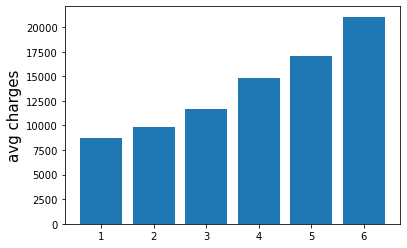

In [13]:
plt.bar(list(range(1,7)), age_charges_mean)
plt.ylabel('avg charges',fontsize=15)
plt.show()

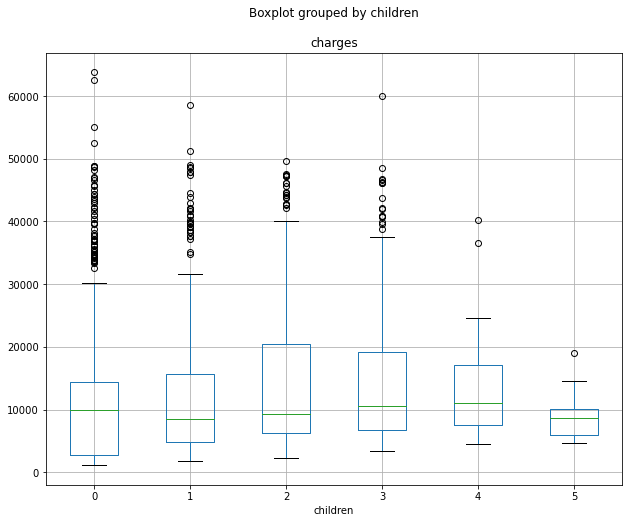

In [96]:
df.boxplot(column='charges', by='children', figsize=(10,8))

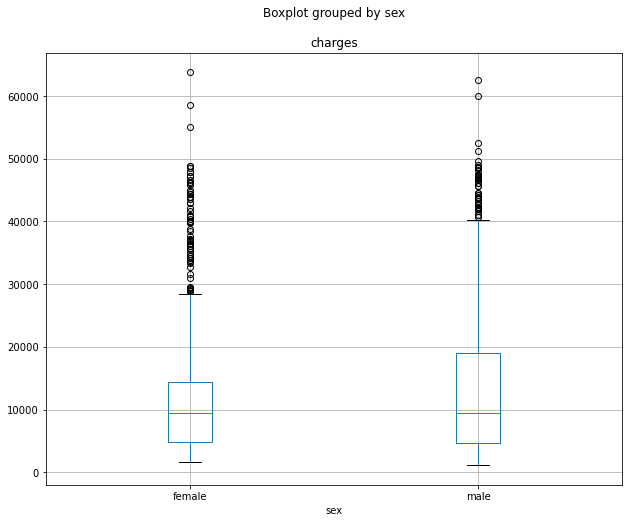

In [100]:
df.boxplot(column='charges',by='sex', figsize=(10,8))

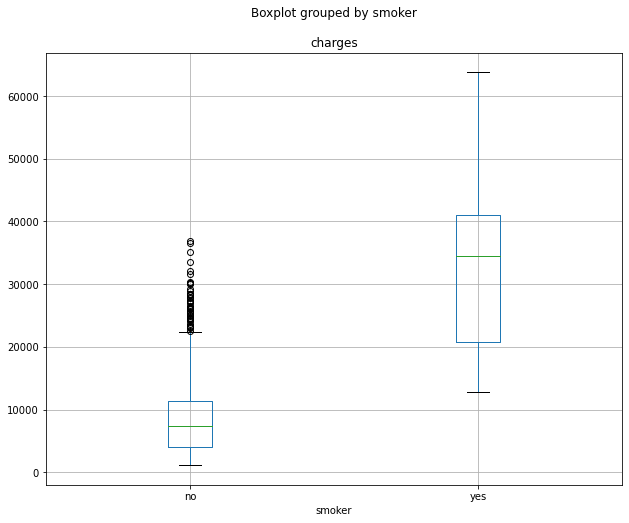

In [102]:
df.boxplot(column='charges', by='smoker', figsize=(10,8))

In [18]:
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(), [1,4]), ('region_encoder', OneHotEncoder(drop='first'), [5])], remainder='passthrough')
X = ct.fit_transform(X) # integer/ordinal encoding sex and smoker

In [19]:
# X = [sex, smoker, region, age, bmi, children]

In [20]:
X[:10], 

array([[0.0, 1.0, 0.0, 0.0, 1.0, 19, 27.9, 0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 18, 33.77, 1],
       [1.0, 0.0, 0.0, 1.0, 0.0, 28, 33.0, 3],
       [1.0, 0.0, 1.0, 0.0, 0.0, 33, 22.705, 0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 32, 28.88, 0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 31, 25.74, 0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 46, 33.44, 1],
       [0.0, 0.0, 1.0, 0.0, 0.0, 37, 27.74, 3],
       [1.0, 0.0, 0.0, 0.0, 0.0, 37, 29.83, 2],
       [0.0, 0.0, 1.0, 0.0, 0.0, 60, 25.84, 0]], dtype=object)

## Assumptions :-

### 1. Linearity

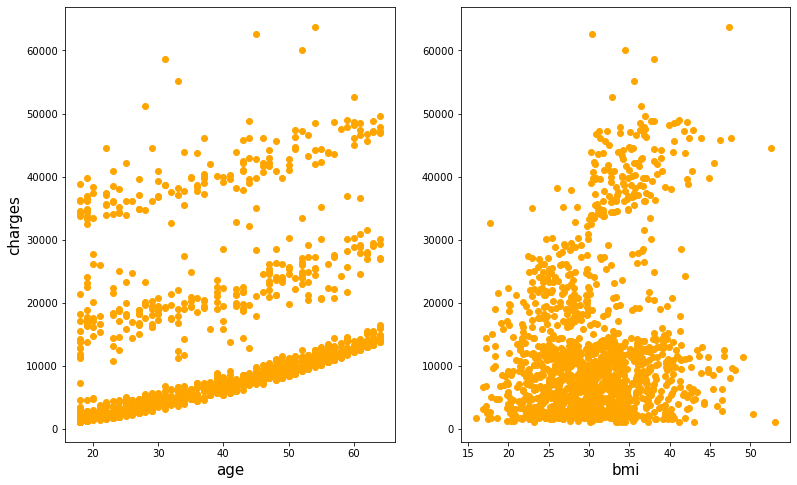

In [9]:
fig, axs = plt.subplots(1,2, figsize=(13,8))
axs[0].scatter(df.age, df.charges, c='orange')
axs[0].set_xlabel('age', fontsize=15)
axs[0].set_ylabel('charges', fontsize=15)

axs[1].scatter(df.bmi, df.charges, c='orange')
axs[1].set_xlabel('bmi', fontsize=15)

plt.show()

### 2. Multivariate normality

In [38]:
# i.e. the residuals are normally distributed
train_pred = reg.predict(X_train)
residuals = Y_train - train_pred 

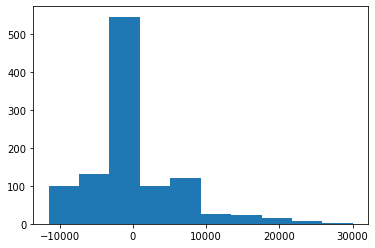

In [39]:
plt.hist(residuals)
plt.show()

### 3. Multicollinearity test

In [8]:
df.corr() #no risk of multicollinearity

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


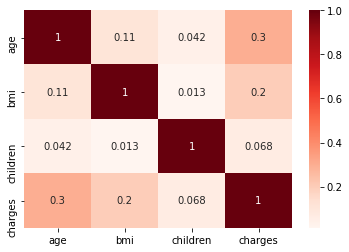

In [42]:
sb.heatmap(df.corr(), annot=True, cmap='Reds')
plt.show()

### 4. Homoscedasticity

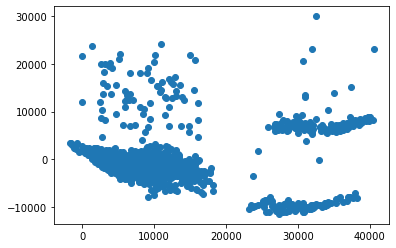

In [46]:
plt.scatter(train_pred, residuals)
plt.show()

### Model Training

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [22]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [27]:
reg.coef_, reg.intercept_

(array([ -242.15, 23786.49,  -396.1 , -1038.38,  -903.03,   257.49,
          321.62,   408.06]),
 -11297.610008539443)

In [24]:
y_pred = reg.predict(X_test)

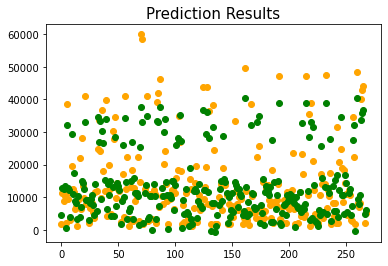

In [25]:
plt.scatter(list(range(len(X_test))), Y_test, c='orange')
plt.scatter(list(range(len(X_test))), y_pred, c='green')
plt.title('Prediction Results', fontsize=15)
plt.show()

In [26]:
r2_score(Y_test, y_pred)

0.7623311844057113

### Model training w/o region 

In [3]:
df.drop(labels='region',axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [4]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [5]:
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(), [1,4])], remainder='passthrough')
X = ct.fit_transform(X) # integer/ordinal encoding sex and smoker

In [6]:
X[:10] # [sex, smoker, age, bmi, children]

array([[0.0, 1.0, 19, 27.9, 0],
       [1.0, 0.0, 18, 33.77, 1],
       [1.0, 0.0, 28, 33.0, 3],
       [1.0, 0.0, 33, 22.705, 0],
       [1.0, 0.0, 32, 28.88, 0],
       [0.0, 0.0, 31, 25.74, 0],
       [0.0, 0.0, 46, 33.44, 1],
       [0.0, 0.0, 37, 27.74, 3],
       [1.0, 0.0, 37, 29.83, 2],
       [0.0, 0.0, 60, 25.84, 0]], dtype=object)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [8]:
reg2 = LinearRegression()
reg2.fit(X_train, Y_train)

LinearRegression()

In [9]:
reg2.coef_, reg2.intercept_

(array([ -236.13304787, 23767.78441294,   258.1348647 ,   304.89099562,
          406.14637976]),
 -11400.773630196727)

In [10]:
y_pred = reg2.predict(X_test)

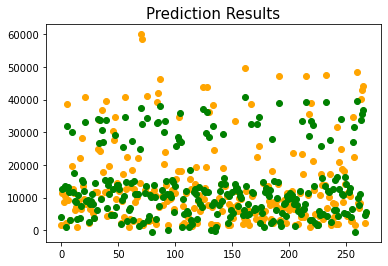

In [11]:
plt.scatter(list(range(len(X_test))), Y_test, c='orange')
plt.scatter(list(range(len(X_test))), y_pred, c='green')
plt.title('Prediction Results', fontsize=15)
plt.show()

In [12]:
r2_score(Y_test, y_pred)

0.7608581750738532

In [ ]:
# region is not a significant predictor as expected since no effect on predcitions/r2_score.